<a href="https://colab.research.google.com/github/nyanta012/demo/blob/main/Gemini_pro_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U google-generativeai

# API KEYの設定など

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [3]:
import getpass
apikey = getpass.getpass(prompt = 'GeminiのAPIキーを入力してください') # https://makersuite.google.com/app/apikey
genai.configure(api_key=apikey)

GeminiのAPIキーを入力してください··········


# 言語生成モデル

In [4]:
model = genai.GenerativeModel('gemini-pro')

In [6]:
response = model.generate_content("Pythonの勉強方法を教えてください",
                                  generation_config=genai.types.GenerationConfig(
                                      candidate_count=1, # 現在は1個まで
                                      temperature=0.9
                                  ))
to_markdown(response.text)

> 1. Pythonの基礎を理解する。変数、関数、制御フロー、データ構造、オブジェクト指向プログラミングなど。
> 2. Pythonの開発環境をセットアップする。テキストエディタやIDE、Pythonがインストールされていることを確認する。
> 3. Pythonのチュートリアルやオンラインコースを受講する。初心者向けのチュートリアルやコースはたくさんあります。
> 4. Pythonのドキュメントを読む。Pythonの公式ドキュメントは、Pythonの言語とその機能について包括的な情報源です。
> 5. Pythonのプロジェクトに取り組む。コードを書く練習をすることで、Pythonのスキルを向上させることができます。
> 6. Pythonのコミュニティに参加する。Pythonのコミュニティは活発で、質問や問題点を助けてくれる人がたくさんいます。
> 7. Pythonの書籍や記事を読む。Pythonに関する書籍や記事はたくさんありますので、それらを活用して自分のスキルを向上させましょう。
> 8. Pythonの動画を見る。Pythonに関する動画はたくさんオンラインで公開されています。それらを見て、Pythonのスキルを向上させましょう。
> 9. Pythonのコードを読み込む。Pythonのコードを読み、他の開発者のコードから学ぶことができます。
> 10. Pythonのコードを定期的に書く習慣をつける。コードを定期的に書くことで、Pythonのスキルを向上させることができます。

In [7]:
response.candidates

[content {
  parts {
    text: "1. Python\343\201\256\345\237\272\347\244\216\343\202\222\347\220\206\350\247\243\343\201\231\343\202\213\343\200\202\345\244\211\346\225\260\343\200\201\351\226\242\346\225\260\343\200\201\345\210\266\345\276\241\343\203\225\343\203\255\343\203\274\343\200\201\343\203\207\343\203\274\343\202\277\346\247\213\351\200\240\343\200\201\343\202\252\343\203\226\343\202\270\343\202\247\343\202\257\343\203\210\346\214\207\345\220\221\343\203\227\343\203\255\343\202\260\343\203\251\343\203\237\343\203\263\343\202\260\343\201\252\343\201\251\343\200\202\n2. Python\343\201\256\351\226\213\347\231\272\347\222\260\345\242\203\343\202\222\343\202\273\343\203\203\343\203\210\343\202\242\343\203\203\343\203\227\343\201\231\343\202\213\343\200\202\343\203\206\343\202\255\343\202\271\343\203\210\343\202\250\343\203\207\343\202\243\343\202\277\343\202\204IDE\343\200\201Python\343\201\214\343\202\244\343\203\263\343\202\271\343\203\210\343\203\274\343\203\253\343\201\225\34

# 画像生成モデル

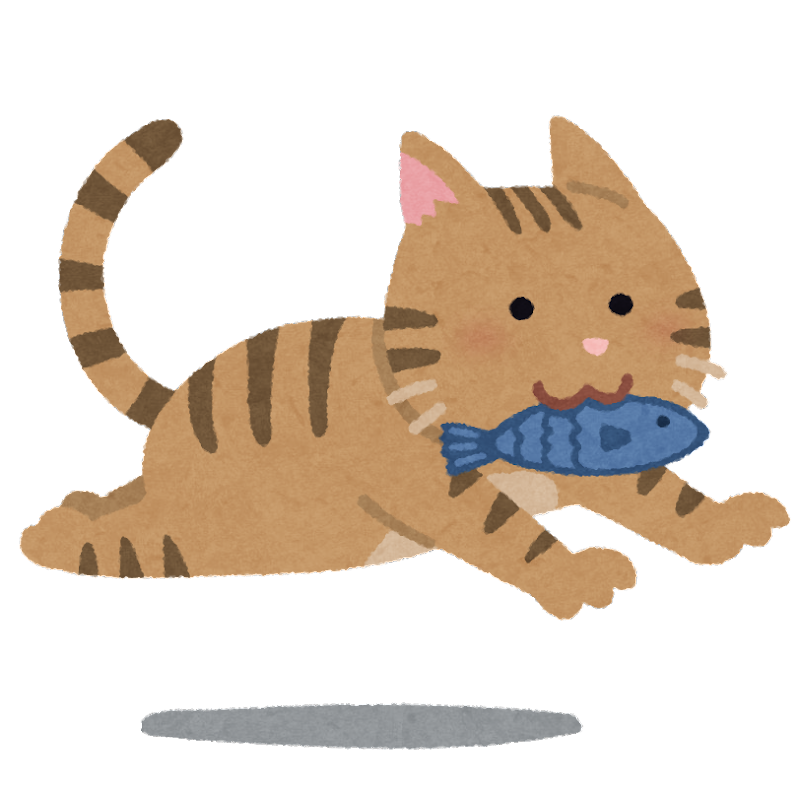

In [8]:
import PIL.Image

img = PIL.Image.open('cat_fish_run.png')
img

In [9]:
model = genai.GenerativeModel('gemini-pro-vision')

In [11]:
response = model.generate_content(["この画像を基に歌を作ってください", img], stream=True)
response.resolve()
to_markdown(response.text)

>  猫が魚をくわえて走っている
> どこまでもどこまでも走っている
> 猫は魚を離さない
> 猫は魚を愛している
> 
> 猫が魚をくわえて走っている
> どこまでもどこまでも走っている
> 猫は魚を離さない
> 猫は魚を愛している
> 
> 猫が魚をくわえて走っている
> どこまでもどこまでも走っている
> 猫は魚を離さない
> 猫は魚を愛している

# Geminiのチャットを使ってみる

In [12]:
model = genai.GenerativeModel('gemini-pro')

In [13]:
from IPython.display import HTML, display

def display_message(message, background_color="#DDDDDD"):
    display(HTML(f"<div style='background-color: {background_color}; padding: 10px;'>{message}</div>"))

chat = model.start_chat(history=[])
while True:
    user_message = input("You: ")
    response = chat.send_message(user_message)
    gemini_message = chat.history[-1].parts[0].text
    display_message(f'Gemini: {gemini_message}', background_color="#AAF0D1")

You: こんにちは


You: 日本の首都はどこですか？


You: OpenAIについてどう思いますか？


StopCandidateException: ignored